### Telco Customer Churn

16/04/2020 

Dataset from Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn

The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

#### Import Libraries

In [1789]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import itertools

import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn") #Load plot theme for whole notebook

#### Data Cleaning

In [1790]:
#Load dataset 
df = pd.read_csv('Telco-Customer-Churn.csv')
df2 = df.copy()
#convert total charge object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isna().sum()
df = df.replace('NaN', 0) # replace the string with 0 if NAN is a string
# df2[df2['TotalCharges'].isna()]
df.fillna(0, inplace=True) # replace NAN with 0 since looking at the data the contract tenure is 0 hence no total charge.

In [1791]:
# Convert yes/no to 1/0
# columns_to_convert = ['Partner', 
#                       'Dependents', 
#                       'PhoneService', 
#                       'PaperlessBilling', 
#                       'Churn']

# for item in columns_to_convert:
#     df[item].replace(to_replace='yes', value=1, inplace=True)
#     df[item].replace(to_replace='no',  value=0, inplace=True)
# df.head()

#### EDA

In [1792]:
print('Shape:', df.shape)
df.info()

Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float6

In [1793]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [1794]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1795]:
for item in df.columns:
    print(item)
    print (df[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [1796]:
df.groupby('gender').size().sort_values(ascending = False)
df.groupby('SeniorCitizen').size().sort_values(ascending = False)

SeniorCitizen
0    5901
1    1142
dtype: int64

In [1797]:
# Dictionary of pandas series but called via index rather than name. 
lst = []
for i in df.columns:
    lst.append(df.groupby(i).size().sort_values(ascending = True).reset_index())
# gender_order = df.groupby('gender').size().sort_values(ascending = True).reset_index()
# test = ({'gender': lst[i][df.columns[i]]})
print(df.columns)
order_dict = ({'gender': lst[1]['gender'].sort_values(ascending = True),
        'SeniorCitizen': lst[2]['SeniorCitizen']})

# Create a dictionary of pandas series for ordering plots 
order_dict2 = {}
list_dict = df.columns
for i in df.columns:       
        order_dict2[i] = []
        order_dict2[i].append(df.groupby(i).size().sort_values(ascending = False).reset_index()[i])
        order_dict2[i] = pd.Series(order_dict2[i][0]) # convert list to pandas series
order_dict2['gender']

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


0      Male
1    Female
Name: gender, dtype: object

#### Data Visualisation

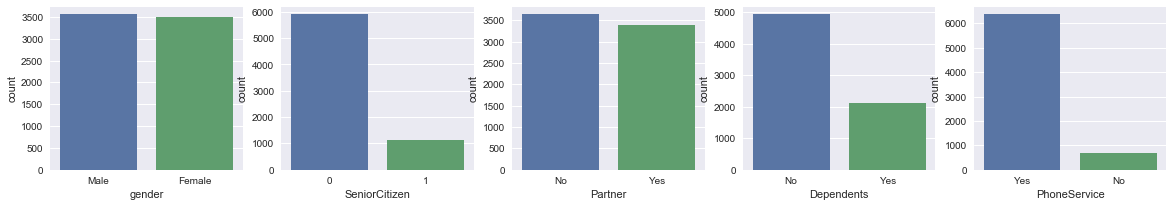

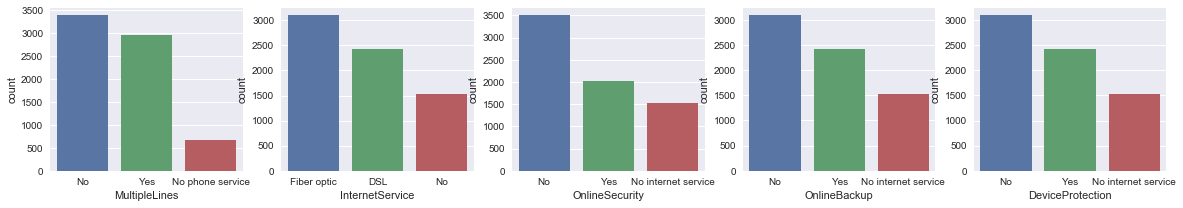

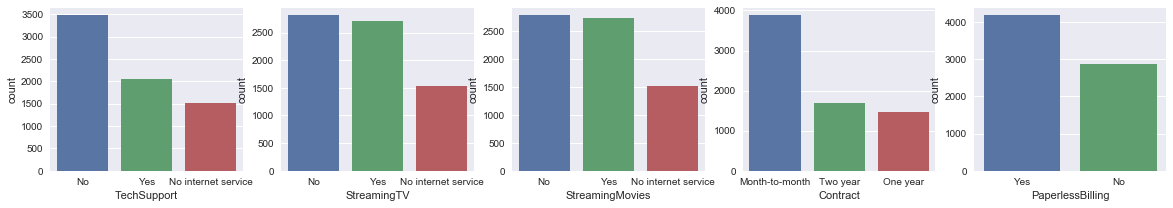

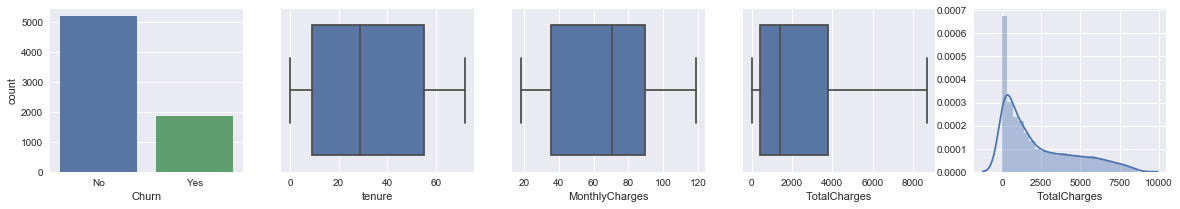

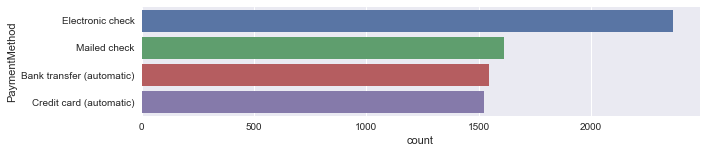

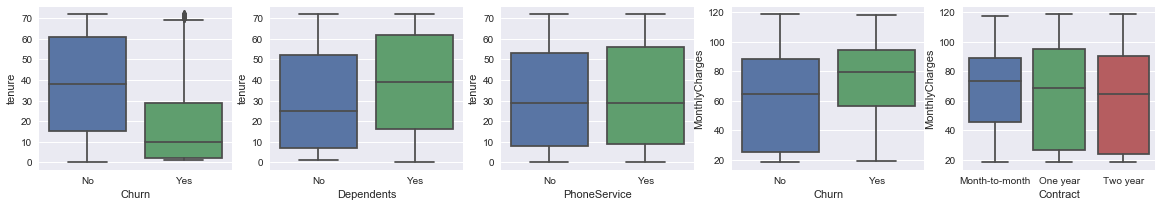

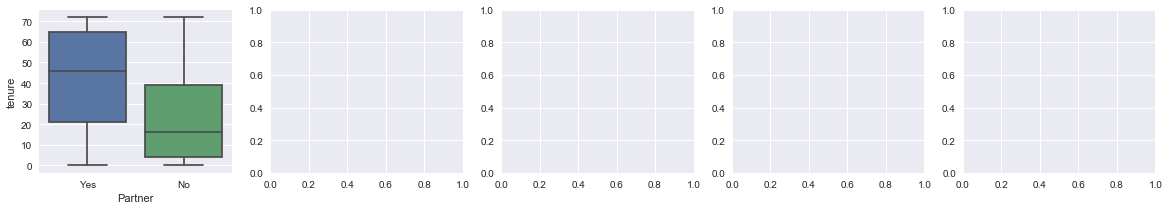

In [1798]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize =(20,3))
sns.countplot(data = df, x='gender', ax=ax1, order = order_dict2['gender'])
sns.countplot(data = df, x='SeniorCitizen', ax=ax2, order = order_dict2['SeniorCitizen'])
sns.countplot(data = df, x='Partner', ax=ax3, order = order_dict2['Partner'])
sns.countplot(data = df, x='Dependents', ax=ax4, order = order_dict2['Dependents'])
sns.countplot(data = df, x='PhoneService', ax=ax5, order = order_dict2['PhoneService'])

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize =(20,3))
sns.countplot(data = df, x='MultipleLines', ax=ax1, order = order_dict2['MultipleLines'])
sns.countplot(data = df, x='InternetService', ax=ax2, order = order_dict2['InternetService'])
sns.countplot(data = df, x='OnlineSecurity', ax=ax3, order = order_dict2['OnlineSecurity'])
sns.countplot(data = df, x='OnlineBackup', ax=ax4, order = order_dict2['OnlineBackup'])
sns.countplot(data = df, x='DeviceProtection', ax=ax5, order = order_dict2['DeviceProtection'])

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize =(20,3))
sns.countplot(data = df, x='TechSupport', ax=ax1, order = order_dict2['TechSupport'])
sns.countplot(data = df, x='StreamingTV', ax=ax2, order = order_dict2['StreamingTV'])
sns.countplot(data = df, x='StreamingMovies', ax=ax3, order = order_dict2['StreamingMovies'])
sns.countplot(data = df, x='Contract', ax=ax4, order = order_dict2['Contract'])
sns.countplot(data = df, x='PaperlessBilling', ax=ax5, order = order_dict2['PaperlessBilling'])


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize =(20,3))
sns.countplot(data = df, x='Churn', ax=ax1, order = order_dict2['Churn'])
sns.boxplot(df['tenure'], ax=ax2)
sns.boxplot(df['MonthlyCharges'], ax=ax3)
sns.boxplot(df['TotalCharges'], ax=ax4)
sns.distplot(df['TotalCharges'], ax=ax5)

fig, (ax1) = plt.subplots(1,1, figsize =(10,2))
sns.countplot(data = df, y='PaymentMethod', order = order_dict2['PaymentMethod'])

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize =(20,3))
sns.boxplot(df['Churn'], df['tenure'], ax=ax1)
sns.boxplot(df['Dependents'], df['tenure'], ax=ax2)
sns.boxplot(df['PhoneService'], df['tenure'], ax=ax3)
sns.boxplot(df['Churn'], df['MonthlyCharges'], ax=ax4)
sns.boxplot(df['Contract'], df['MonthlyCharges'], ax=ax5)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize =(20,3))
sns.boxplot(df['Partner'], df['tenure'], ax=ax1)
# sns.boxplot(df['Dependents'], df['tenure'], ax=ax2)
# sns.boxplot(df['PhoneService'], df['tenure'], ax=ax3)
# sns.boxplot(df['Churn'], df['MonthlyCharges'], ax=ax4)
# sns.boxplot(df['Contract'], df['MonthlyCharges'], ax=ax5)


- Customer with partner are less likely to leave / has higher tenure 
- Customer with dependants tend to have higher tenure
- 

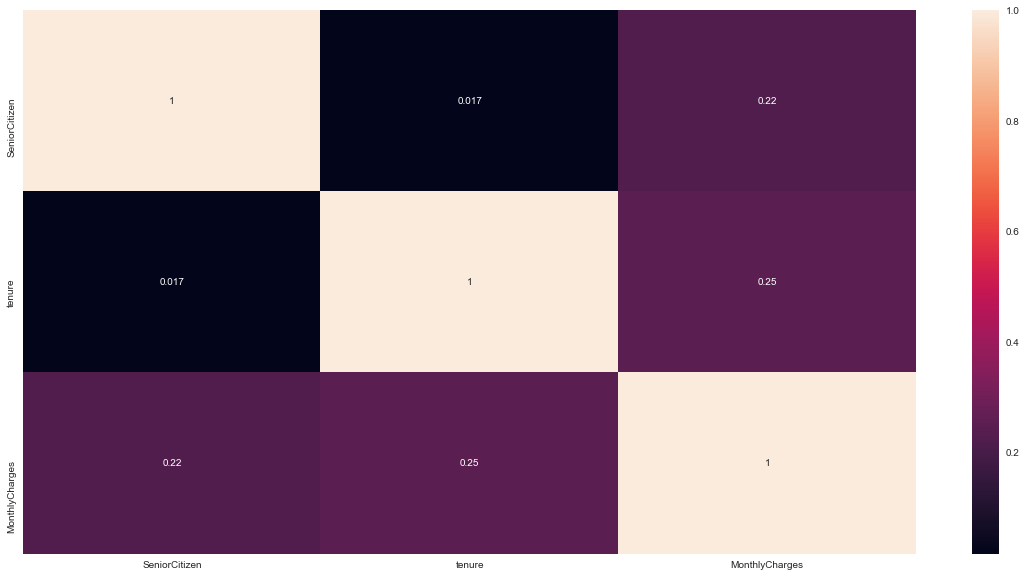

In [1799]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr
correlation_df = show_correlations(df2,show_chart=True)

#### Machine Learning: Predicting whether a customer will churn

In [1800]:
df2.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##### Onehot encoding

In [1801]:
# one-hot encoding - pd.getdummy()
df2 = pd.read_csv('Telco-Customer-Churn.csv')
customer_id = df2['customerID'] # Store this as customer_id variable
TotalCharges = df2['TotalCharges'] # Store this as customer_id variable
df2 = df2.drop(['customerID', 'TotalCharges'], axis=1)
# ml_dummies = pd.get_dummies(df2, drop_first=True)
ml_dummies = pd.get_dummies(df2)
ml_dummies.fillna(value=0, inplace=True)
ml_dummies.head()
# Add a random column to the dataframe
# ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

corr = ml_dummies.corr()
corr['Churn_Yes'].sort_values(ascending = False).head()
# ax = sns.heatmap(corr,)
X_2 = ml_dummies
X_2.columns
show_correlations(ml_dummies, show_chart=False)["Churn_Yes"].sort_values(ascending=False)
X_2.drop(['Churn_Yes'], axis=1).values.shape

(7043, 45)

<Figure size 1440x720 with 0 Axes>

In [1802]:
a = [1, 2, 3, 4, 10, 15, 7, 8]
print(a[5])
print(a[0:5])

15
[1, 2, 3, 4, 10]


In [1803]:
# Dropping features which are not as relevant to our model
df_model = X_2.drop(['Churn_Yes'], axis=1)
df_model = df_model.values
X , y = df_model[:,0:44], df_model[:,44]      #index 45 is the label (45: 0->44 = 45), slicing 0:44 = 44

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = MinMaxScaler()

rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

print(rescaledX_train.shape)
print(rescaledX_test.shape)

# training model
logreg = LogisticRegression()
logreg2 = LogisticRegression()
logreg.fit(rescaledX_train, y_train)
logreg2.fit(X_train, y_train)

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)
y_pred2 = logreg2.predict(X_test)
y_pred3 = logreg.predict(rescaledX_train)
y_pred4 = logreg2.predict(X_train)

# Get the accuracy score of logreg model and print it
# print("Accuracy of logistic regression classifier of TRAIN set       : ", logreg.score(rescaledX_train, y_train))
print("Accuracy of logistic regression classifier of TRAIN -         : ", accuracy_score(y_train, y_pred4))
print("Accuracy of logistic regression classifier of TRAIN - SCALED  : ", accuracy_score(y_train, y_pred3))
print("Accuracy of logistic regression classifier of test set- SCALED: ", accuracy_score(y_test, y_pred))
print("Accuracy of logistic regression classifier of test set        : ", accuracy_score(y_test, y_pred2))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred2))

### Random Forest
RandomForest = RandomForestClassifier( n_estimators = 10, random_state = 3)
RandomForest2 = RandomForestClassifier( n_estimators = 10, random_state = 3)
# load the classifier
RandomForest.fit(rescaledX_train, y_train) # fit data points and labels
RandomForest2.fit(X_train, y_train) # fit data points and labels
y_pred = RandomForest.predict(rescaledX_train) 
y_pred2 = RandomForest.predict(rescaledX_test)

print(confusion_matrix(y_train, y_pred))
# print('Score: ', RandomForest.score(X_train, y_train)) 
print("Accuracy of RF classifier of train set- SCALED: ", accuracy_score(y_train, y_pred)) # score() Returns the mean accuracy on the given test data and labels.
y_pred = RandomForest.predict(rescaledX_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy of RF classifier of test set- SCALED: ", accuracy_score(y_test, y_pred2))

(5634, 44) (5634,)
(1409, 44) (1409,)
(5634, 44)
(1409, 44)
Accuracy of logistic regression classifier of TRAIN -         :  0.8074192403265885
Accuracy of logistic regression classifier of TRAIN - SCALED  :  0.8072417465388712
Accuracy of logistic regression classifier of test set- SCALED:  0.7899219304471257
Accuracy of logistic regression classifier of test set        :  0.7885024840312278
[[201 180]
 [116 912]]
[[201 180]
 [118 910]]
[[1454   34]
 [  42 4104]]
Accuracy of RF classifier of train set- SCALED:  0.9865104721334753
[[204 177]
 [175 853]]
Accuracy of RF classifier of test set- SCALED:  0.7501774308019872


In [1804]:
feature_df = pd.DataFrame()
feature_df['features'] = X_2.drop(['Churn_Yes', 'Churn_No'], axis=1).columns
feature_df['importance'] = RandomForest.feature_importances_
feature_df.sort_values(by='importance', ascending=False).head()
# rescaledX_train.shape

,features,importance
1,tenure,0.198024
2,MonthlyCharges,0.186102
35,Contract_Month-to-month,0.049438
17,OnlineSecurity_No,0.042469
42,PaymentMethod_Electronic check,0.035830


In [1805]:
X_2.drop(['Churn_Yes', 'Churn_No', 'PaymentMethod_Mailed check'], axis=1).shape
X.shape
X_2.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling

Confusion matrix, without normalization
[[204 177]
 [175 853]]
Normalized confusion matrix
[[0.54 0.46]
 [0.17 0.83]]


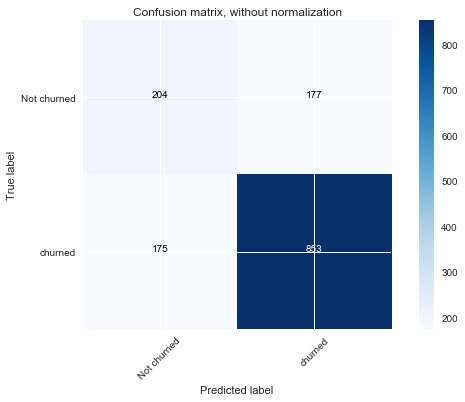

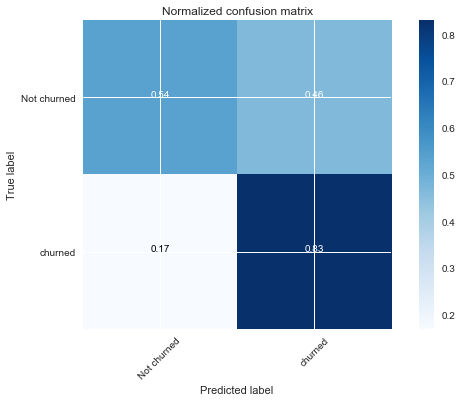

In [1806]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [1807]:
# Preprocessing original dataframe
def preprocess_df(dataframe):
    x = dataframe.copy()
    try:
        customer_id = x['customerID']
        del x['customerID'] # Don't need in ML DF
        del x['Churn_Yes'] # Don't need in ML DF
    except:
        print("already removed customerID")
    ml_dummies = pd.get_dummies(x)
    ml_dummies.fillna(value=0, inplace=True)

    # import random done above
    ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

    try:
        label = ml_dummies['Churn_No']
        del ml_dummies['Churn_No']
    except:
        print("label already removed.")
    return ml_dummies, customer_id, label

original_df = preprocess_df(df)

already removed customerID


In [1808]:
output_df = original_df[0].copy()
# output_df['---randomColumn---']
# output_df['prediction'] = RandomForest.predict_proba(output_df)[:,1]
# output_df['churn'] = original_df[2]
# output_df['customerID'] = original_df[1]

##### Using label encoding

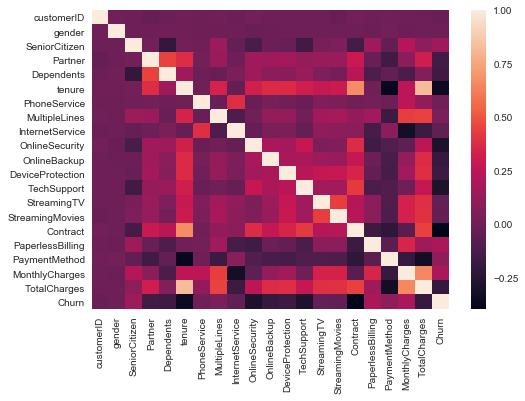

In [1809]:
#Label encoding -> this as disadvantage as it encodes the values sequentially but in one-hot encoding it's not instead it creates a new coloumn for each category which consume more storage. 
# df.select_dtypes(include=[object])
# le = LabelEncoder()
# X_2 = df.apply(le.fit_transform) # use df.apply() to apply le.fit_transform to all columns
# X_2.dtypes

le = LabelEncoder()
for col in df:
    if df[col].dtypes == 'object':
         df[col]=le.fit_transform(df[col])
X_2 = df
corr = X_2.corr()
ax = sns.heatmap(
    corr, 
#     vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True
)

In [1810]:
# Dropping features which are not as relevant to our model
df_model = X_2.drop(['customerID', 'gender', 'tenure', 'OnlineSecurity', 'TechSupport', 'Contract'], axis=1)
df_model = df_model.values
X , y = df_model[:,0:14], df_model[:,14]

In [1811]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5634, 14) (5634,)
(1409, 14) (1409,)


In [1812]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = MinMaxScaler()

rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

print(rescaledX_train.shape)
print(rescaledX_test.shape)

(5634, 14)
(1409, 14)


In [1813]:
# training model
logreg = LogisticRegression()
logreg2 = LogisticRegression()
logreg.fit(rescaledX_train, y_train)
logreg2.fit(X_train, y_train)

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)
y_pred2 = logreg2.predict(X_test)
y_pred3 = logreg.predict(rescaledX_train)
y_pred4 = logreg2.predict(X_train)

# Get the accuracy score of logreg model and print it
# print("Accuracy of logistic regression classifier of TRAIN set       : ", logreg.score(rescaledX_train, y_train))
print("Accuracy of logistic regression classifier of TRAIN -         : ", accuracy_score(y_train, y_pred4))
print("Accuracy of logistic regression classifier of TRAIN - SCALED  : ", accuracy_score(y_train, y_pred3))
print("Accuracy of logistic regression classifier of test set- SCALED: ", accuracy_score(y_test, y_pred))
print("Accuracy of logistic regression classifier of test set        : ", accuracy_score(y_test, y_pred2))


# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred2))

Accuracy of logistic regression classifier of TRAIN -         :  0.7969471068512602
Accuracy of logistic regression classifier of TRAIN - SCALED  :  0.7949946751863685
Accuracy of logistic regression classifier of test set- SCALED:  0.7764371894960965
Accuracy of logistic regression classifier of test set        :  0.7778566359119943
[[918 110]
 [205 176]]
[[918 110]
 [203 178]]


In [1814]:
print(logreg.predict(X_test))

[0. 0. 0. ... 0. 0. 0.]


In [1815]:
# manually testing our model
# print(X_2.drop(['tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'TotalCharges', 'Churn'], axis=1).columns)
print(logreg2.predict([[0,0,0,0,0,0,0,0,0,0,0,1,1,50]]))

[0.]


In [1816]:
X_2.drop(['customerID', 'gender', 'tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'TotalCharges'], axis=1).describe()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,0.903166,0.940508,0.872923,0.906432,0.904444,0.985376,0.992475,0.592219,1.574329,64.761692,0.265370
std,0.368612,0.499748,0.458110,0.295752,0.948554,0.737796,0.880162,0.879949,0.885002,0.885091,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,70.350000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


In [1817]:
RandomForest = RandomForestClassifier(
    n_estimators = 10,
    random_state = 3
) # load the classifier
RandomForest.fit(rescaledX_train, y_train) # fit data points and labels
y_pred = RandomForest.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print('Score: ', RandomForest.score(X_train, y_train)) # score() Returns the mean accuracy on the given test data and labels.

[[4145    1]
 [1487    1]]
Score:  0.7358892438764644


In [1818]:
y_pred = RandomForest.predict(rescaledX_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy of Random Forest classifier of test set- SCALED: ", accuracy_score(y_test, y_pred))

[[928 100]
 [225 156]]
Accuracy of Random Forest classifier of test set- SCALED:  0.7693399574166075


In [1819]:
print(RandomForest.predict([[1,1,1,2,1,1,1,1,1,0,0,1,1,10]]))

[0.]


In [1820]:
feature_df = pd.DataFrame()
# feature_df['features'] = df.columns
feature_df['importance'] = RandomForest.feature_importances_
feature_df.sort_values(by='importance', ascending=False).head()    
# feature_df.set_index(keys='features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))

,importance
13,0.350571
12,0.266887
11,0.069955
6,0.047608
5,0.043773


In [1821]:
feature_df = pd.DataFrame()
feature_df['features'] = X_2.drop(['customerID', 'gender', 'tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'Churn'], axis=1).columns
feature_df['importance'] = RandomForest.feature_importances_
feature_df.sort_values(by='importance', ascending=False) 

,features,importance
13,TotalCharges,0.350571
12,MonthlyCharges,0.266887
11,PaymentMethod,0.069955
6,OnlineBackup,0.047608
5,InternetService,0.043773
7,DeviceProtection,0.040563
10,PaperlessBilling,0.032469
1,Partner,0.029084
4,MultipleLines,0.026946
0,SeniorCitizen,0.024285


In [1822]:
show_correlations(df, show_chart=False)["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198324
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

<Figure size 1440x720 with 0 Axes>

#### Conclusion

#### Further work

In [1823]:
# balance number of churn vs non-churn when building our model
# https://www.kaggle.com/danwheble/churn-prediction-telco-customer-churn

#### Appendix